In [86]:
# This script detects faces in picture, rotates the pictures automatically according to the exif tag (jhead must be installed)
# asks for the Names of the people and adds the names as in the Note field of the Exif info.
# It uses the face_recognition library to detect automatically faces. 
# It then writes the names as "Jon Doe, John Smith, ..." to the comment exif tag  (in the order from left to right)

########## Install Instructions
# conda install -c menpo dlib 
# pip install face_recognition

import face_recognition
import os, sys
import numpy as np
import piexif
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle #pickle.dump( data, open( "file.save", "wb" ) ) #data = pickle.load( open( "file.save", "rb" ) )
import subprocess 
from pathlib import Path


plt.rcParams['toolbar'] = 'None'

## Functions

In [87]:
def in_notebook():
    """
    Returns ``True`` if the module is running in IPython kernel,
    ``False`` if in IPython shell or other Python shell.
    """
    return 'ipykernel' in sys.modules

if in_notebook():
    print('Running in Notebook')
else:
    print('Running in Shell')

    

def ExpandDirectories(flist, ending='.jpg', not_conatin=None):
    newplotfiles = []
    if isinstance(flist,str):
        flist = [flist]
    for directory in flist:
        if os.path.isdir(directory):
            for dirpath, dirnames, files in os.walk(directory, followlinks=True):
                for name in files:
                    if (ending.lower() in name.lower()) and (not_conatin==None or not_conatin not in name  ):
                        newplotfiles += [os.path.join(dirpath, name)]
#                         print('Include '+name)
        elif os.path.isfile(directory):
            newplotfiles += [directory]
    return newplotfiles




def ShowImg(pic, title='', trim=None, Timer=1):
    if isinstance(pic,str):
        data = mpimg.imread(pic)
    else:
        data = pic
    if trim!=None:
        fig = plt.imshow(data[trim[0]:trim[2],trim[3]:trim[1]])
    else:
        fig = plt.imshow(data)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.suptitle(title) 
    if Timer!=None:
        plt.show(block=False)
        if not in_notebook(): plt.pause(Timer)
        plt.close()
    else:
        plt.show(block=False)
        if not in_notebook(): plt.pause(0.3)
    return data


def arr2str(arr, sep=', ', pre_counter=False, pre_counter_str=' = '):
    output = ''
    for i,item in enumerate(arr):
        if pre_counter:      output += str(i)+pre_counter_str
        output += str(item)
        if i<len(arr)-1:     output += sep
    return output
        

def ExeCmd(cmd, errormessage='Error'):
    try:
        output = subprocess.check_output(cmd, shell=True)
        if output!= "b''":
            print(output) 
        return output
    except: 
        print(errormessage)    
    
def RotateImg(pic):
    ExeCmd("jhead -autorot \'"+pic+"\'", errormessage= 'Could not rotate picture. Is jhead installed?')
    
    
def MultipleChoice(arr, pre='', post ='Please select:'):
    text = pre+arr2str(arr, sep='\n', pre_counter=True)+'\n'+post+'\n'
    return input(text)
    
# MultipleChoice(['a','b','c'])




def Path2Dir(path,   end_sep=True):
    directory = os.path.dirname(path)
    if end_sep:
        directory = directory+sep_char
    return directory


def Path2Filename(path,  RemoveEnding = False ): 
    filename = os.path.basename(path)
    if RemoveEnding:
        filename = '.'.join(filename.split('.')[:-1])
    return filename



Running in Notebook


## Arguments

In [88]:
args = {
    'folder' : ['/home/alexander/Bilder/Familie'],
    'database' : 'Face_encodings.save',
    'shuffle' : True,
    'softlinks' : True,
    'softlink_folder' : 'People folders',
}


if not in_notebook():
    import argparse

    parser = argparse.ArgumentParser(description='Detect Faces and write them in the exif tag')
    parser.add_argument('-f','--folder',nargs='*', help='Picture folders',type=str , default=args['folder'])
    parser.add_argument('--database', help='Database File, storing the face encodings',type=str , default=args['database'])
    parser.add_argument('--shuffle', type=lambda s: s.lower() in ['true', 't', 'yes', '1'], default=args['shuffle'])
 
    for k,v in vars(parser.parse_args()).items():
        args[k] = v
    


## Load Database

In [89]:
if  os.path.exists(args['database']): 
    faces = pickle.load( open( args['database'], "rb" ) )
else:
    faces = {
        'encs' : [np.zeros([128])]    ,
        'names' : np.array(['0'])     ,       
    }
    
    
    

## Recognize Faces

------------------------------0.00% ,   0/19461
Loading: /home/alexander/Bilder/Familie/Monika/Mamas Gemalte Bilder/RIMG1173.jpg
b'Modified: /home/alexander/Bilder/Familie/Monika/Mamas Gemalte Bilder/RIMG1173.jpg\n'


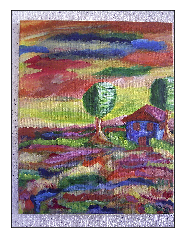

Detecting faces....
No faces found.
------------------------------0.01% ,   1/19461
Loading: /home/alexander/Bilder/Familie/Dominik/2009-03-15 Dominik USA/2009-03-21_Daniel_Photos_NewOrleans/CIMG0290_50.jpg
b''


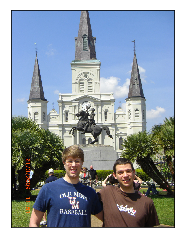

Detecting faces....


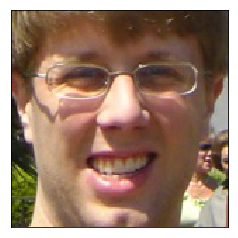

Extending tolerance:
Multiple possible Faces found:
0.85  Minyi Hu
0.80  Alexander Roth
0.89  Ortwin Roth
0.76  Joao de Lima
0.65  Sebastian
0.82  Alexander Roth
0.70  Amelie Moli Roth
0.85  Alexander Roth
0.81  Monika Roth
0.81  Yunlan Chen
0.87  Yunlan Chen
0.82  Alexander Roth
0.94  Kerstin Roth
0.82  Kerstin Roth
0.81  Dominik Roth
0.75  Monika Roth
0.74  Amelie Moli Roth
0.75  Monika Roth
0.78  Monika Roth
0.76  Dominik Roth
0.89  Dominik Roth
0.72  Ivy Klempt
0.87  Dominik Roth
0.75  Alexander Roth
0.82  Monika Roth
0.92  Alexander Roth
0.83  Dominik Roth
0.78  Dominik Roth
0.85  biden
0.82  barack
0.84  women
0.78  Ivy Klempt
0.72  Andreas Müllers
0.81  Rainer Roth
0.85  Dominik Roth
0.70  Monika Roth
0.85  Alexander Roth
0.82  Dominik Roth
0.78  Ortwin Roth
0.78  Dominik Roth
0.72  Ortwin Roth
0.85  Alexander Roth
0.79  Alexander Roth
0.86  Dominik Roth
0.81  Dominik Roth
0.78  Ortwin Roth
0.68  Monika Roth
0.73  Amelie Moli Roth
0.87  Dominik Roth
0.88  Alexander Roth
0.75  An

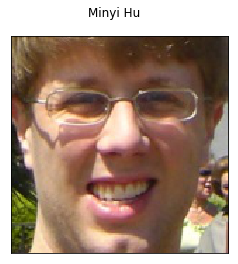

Choosing the closest match: Minyi Hu
0 = Minyi Hu is correct.
1 = empty for Skip
2 = Write any name to add it
Please enter something

Ok. Skipping.
Multiple possible Faces found:
0.43  Dominik Roth
0.34  Dominik Roth
0.44  Dominik Roth


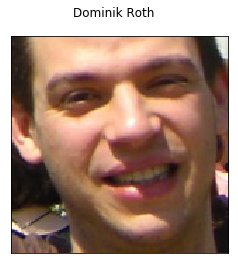

Choosing the closest match: Dominik Roth
Writing names to exif tag: Dominik Roth
b'Modified: /home/alexander/Bilder/Familie/Dominik/2009-03-15 Dominik USA/2009-03-21_Daniel_Photos_NewOrleans/CIMG0290_50.jpg\n'
------------------------------0.01% ,   2/19461
Loading: /home/alexander/Bilder/Familie/Alexander/2012 USA/2012-05-12 Princeton  (Fabian)/P1080933.JPG
b'Modified: /home/alexander/Bilder/Familie/Alexander/2012 USA/2012-05-12 Princeton  (Fabian)/P1080933.JPG\n'


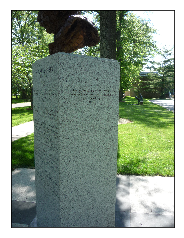

Detecting faces....
No faces found.
------------------------------0.02% ,   3/19461
Loading: /home/alexander/Bilder/Familie/Familie/2005 New York/Original/Kerstin/20050816-2/RIMG0902.jpg
b'Modified: /home/alexander/Bilder/Familie/Familie/2005 New York/Original/Kerstin/20050816-2/RIMG0902.jpg\n'


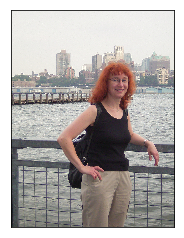

Detecting faces....
Multiple possible Faces found:
0.48  Monika Roth
0.44  Monika Roth
0.44  Monika Roth
0.47  Monika Roth


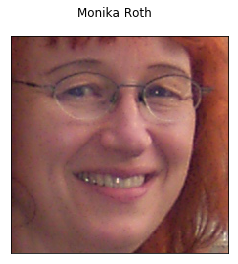

Choosing the closest match: Monika Roth
Writing names to exif tag: Monika Roth
b'Modified: /home/alexander/Bilder/Familie/Familie/2005 New York/Original/Kerstin/20050816-2/RIMG0902.jpg\n'
------------------------------0.02% ,   4/19461
Loading: /home/alexander/Bilder/Familie/Familie/2017-07-19 Garden/DSC05466.JPG
b''


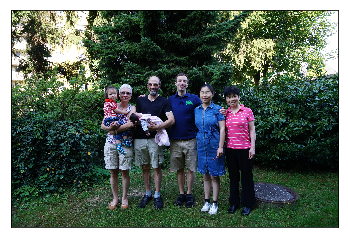

Detecting faces....
Multiple possible Faces found:
0.34  Amelie Moli Roth
0.44  Amelie Moli Roth


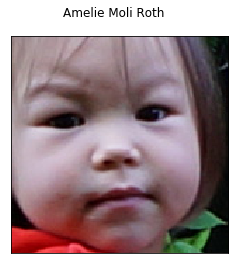

Choosing the closest match: Amelie Moli Roth
Multiple possible Faces found:
0.48  Monika Roth


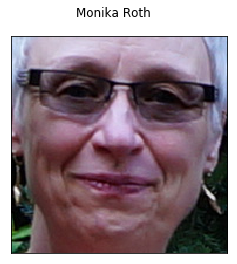

Choosing the closest match: Monika Roth
Multiple possible Faces found:
0.37  Ortwin Roth


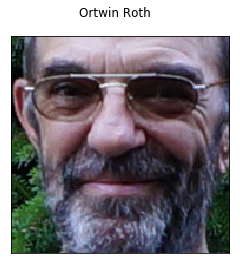

Choosing the closest match: Ortwin Roth
Multiple possible Faces found:
0.37  Alexander Roth
0.46  Alexander Roth
0.36  Alexander Roth
0.43  Alexander Roth


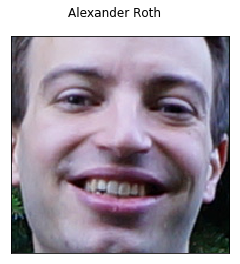

Choosing the closest match: Alexander Roth
Multiple possible Faces found:
0.25  Minyi Hu
0.43  Amelie Moli Roth


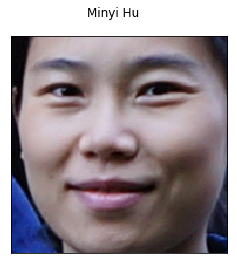

Choosing the closest match: Minyi Hu
Multiple possible Faces found:
0.38  Yunlan Chen
0.41  Yunlan Chen


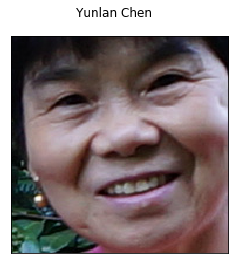

Choosing the closest match: Yunlan Chen
Writing names to exif tag: Amelie Moli Roth, Monika Roth, Ortwin Roth, Alexander Roth, Minyi Hu, Yunlan Chen
b'Modified: /home/alexander/Bilder/Familie/Familie/2017-07-19 Garden/DSC05466.JPG\n'
------------------------------0.03% ,   5/19461
Loading: /home/alexander/Bilder/Familie/Alexander/2012 USA/2012-06-16 to 2012-06-17 Washington Trip/Day 2 - 026 (Chen).jpg
b''


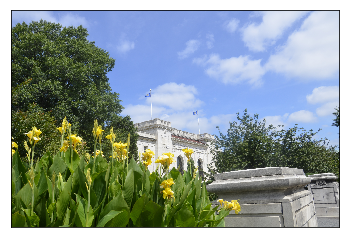

Detecting faces....
No faces found.
------------------------------0.03% ,   6/19461
Loading: /home/alexander/Bilder/Familie/Alexander/Kornnatter/27.11.2011/DSC00980.jpg
b''


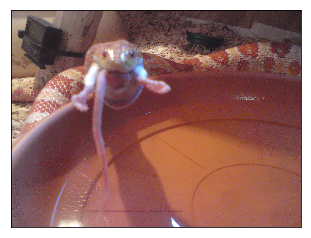

Detecting faces....
No faces found.
------------------------------0.04% ,   7/19461
Loading: /home/alexander/Bilder/Familie/Minyi and Alexander/2016-08 Italy/2016-08-11 and 12 Venice/DSC04462.jpg
b''


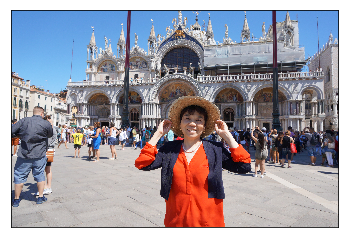

Detecting faces....
Multiple possible Faces found:
0.42  Yunlan Chen
0.47  Yunlan Chen


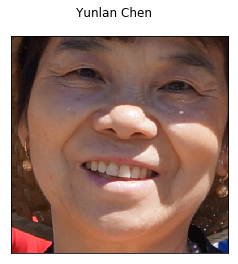

Choosing the closest match: Yunlan Chen
Writing names to exif tag: Yunlan Chen
b'Modified: /home/alexander/Bilder/Familie/Minyi and Alexander/2016-08 Italy/2016-08-11 and 12 Venice/DSC04462.jpg\n'
------------------------------0.04% ,   8/19461
Loading: /home/alexander/Bilder/Familie/Monika and Ortwin Roth/2013-10-06 Menorca/7.10.13/CIMG1500_50.jpg
b''


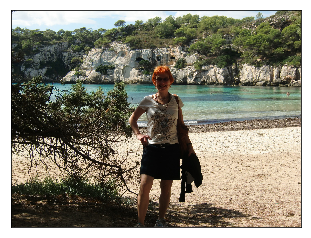

Detecting faces....
Multiple possible Faces found:
0.45  Monika Roth


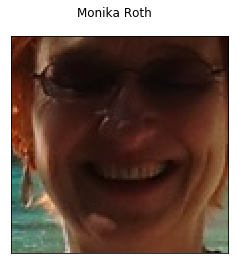

Choosing the closest match: Monika Roth
Writing names to exif tag: Monika Roth
b'Modified: /home/alexander/Bilder/Familie/Monika and Ortwin Roth/2013-10-06 Menorca/7.10.13/CIMG1500_50.jpg\n'
------------------------------0.05% ,   9/19461
Loading: /home/alexander/Bilder/Familie/Alexander/2011 Cern/Alexander/DSC00658.jpg
b''


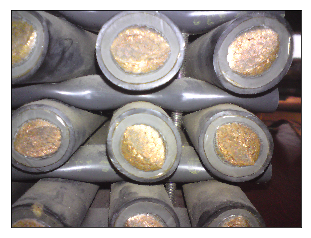

Detecting faces....


KeyboardInterrupt: 

In [97]:
pics = np.array(ExpandDirectories(args['folder']))
if args['shuffle']:
    np.random.shuffle(pics)


    
def ChooseClosestMatch(matches_bool, src_enc):
    red_faces = faces['names'][matches_bool]
    distances = face_recognition.face_distance(faces['encs'][matches_bool], src_enc)
    print('Multiple possible Faces found:\n'+ 
          arr2str(["{0:.2f}".format(d)+'  '+name for d,name in zip(distances,red_faces)], sep='\n'))         
    name = red_faces[np.argmin(distances)]
    ShowImg(pic,title=name,  trim=locs[i], Timer=1)
    print('Choosing the closest match: '+name)     
    return name

def AddFace(name,enc):
    faces['encs'] = np.vstack([faces['encs'],enc])
    faces['names'] = np.hstack([faces['names'],name])
        

for pic_idx, pic in enumerate(pics):
    print("------------------------------"+"{0:.2f}".format(pic_idx/len(pics)*100)+'% ,   '+str(pic_idx)+'/'+str(len(pics)))
    print('Loading: '+pic)
    try:
        RotateImg(pic)
        pic_data = ShowImg(pic, Timer=None)

        print('Detecting faces....')
        image = face_recognition.load_image_file(pic)
        locs = face_recognition.face_locations(image)
        encs = face_recognition.face_encodings(image, known_face_locations=locs)


        # sort according to x coordinate  (left to right)
        x_coors = np.array([l[1] for l in locs])
        sort_idxs = np.argsort(x_coors)
        locs = [locs[idx] for idx in sort_idxs]
        encs = [encs[idx] for idx in sort_idxs]

        plt.close()

        # recognize each face
        if len(encs) ==0: print('No faces found.')
        names = []
        for i in range(len(encs)):
            matches_bool = np.array(face_recognition.compare_faces(faces['encs'], encs[i], tolerance=0.48) )

            
            if matches_bool.any():
                names += [ChooseClosestMatch(matches_bool, encs[i])]
#                 red_faces = faces['names'][matches_bool]
#                 distances = face_recognition.face_distance(faces['encs'][matches_bool], encs[i])
#                 print('Multiple possible Faces found:\n'+ 
#                       arr2str(["{0:.2f}".format(d)+'  '+name for d,name in zip(distances,red_faces)], sep='\n'))         
#                 names += [red_faces[np.argmin(distances)]]                        
#                 ShowImg(pic,title=names[-1],  trim=locs[i], Timer=1)
#                 print('Choosing the closest match: '+names[-1])                    
            else:
                ShowImg(pic, trim=locs[i], Timer=None)
                print('Extending tolerance:')
                matches_bool = np.array(face_recognition.compare_faces(faces['encs'], encs[i], tolerance=1) )
                if matches_bool.any():
                    new_name = ChooseClosestMatch(matches_bool, encs[i])
                    mc = MultipleChoice([new_name+' is correct.', 'empty for Skip', 'Write any name to add it'], 
                                      post='Please enter something')
                    if mc !='0':  new_name = mc   # mc can be empty. then it will skip later
                else:                        
                    new_name = input('Please name this face (empty if you want to skip): ')
                plt.close()
                
                if new_name!='':
                    names += [new_name]
                    AddFace(new_name, encs[i])
                else:
                    print('Ok. Skipping.')


        if len(names)>0:   # only do something if there were faces
            print('Writing names to exif tag: '+arr2str(names))
            output = ExeCmd("jhead -cl \'"+arr2str(names)+"\'   \'" + pic+"\'" , errormessage='Error: Could not write Tags.' )     


            # safe softlink
            if args['softlinks'] and len(pics)>1:
                for name in names:
                    namefolder = os.path.join(args['folder'][0],'..', args['softlink_folder'], name)
                    if not os.path.exists(namefolder):    os.makedirs(namefolder)    
                    relative_from_subfolder = os.path.join('..','..',pic)
                    if not os.path.exists(os.path.join(namefolder,Path2Filename(pic))):
                        os.symlink(relative_from_subfolder, os.path.join(namefolder,Path2Filename(pic)))


            # periodically save the database
            pickle.dump( faces, open( args['database'], "wb" ) ) #data = pickle.load( open( "file.save", "rb" ) )
    except KeyboardInterrupt: 
        raise
    except:
        print('Error in processing image. Skipping.')    

